In [1]:
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from utils.plot_utils import annotate_heatmap, plot_heatmap

In [2]:
environment = "lunarlander"

legends = ["Neural Network", "Linear Model", "Decision Tree (FQI)", "Random Forest (FQI)", "Support Vectors (FQI)", "K-Neighbours (FQI)", "Gaussian Process (FQI)", "Gaussian Process (Online)"]
models = ["Neural Network", "Linear Model", "Decision Tree", "Random Forest", "Support Vectors", "K-Neighbours", "Gaussian Process", "Gaussian Process Online"]
n = len(legends)

data = []
for i in range(len(legends)):
    a = np.genfromtxt(f'results/{environment}/eval_returns/{environment}_eval_{models[i]}.csv', delimiter=',')
    data.append(a[:,-1])

In [3]:
p_values = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        p = ttest_ind(data[i], data[j], equal_var=False).pvalue
        # print(p)
        p_values[i][j] += p
        

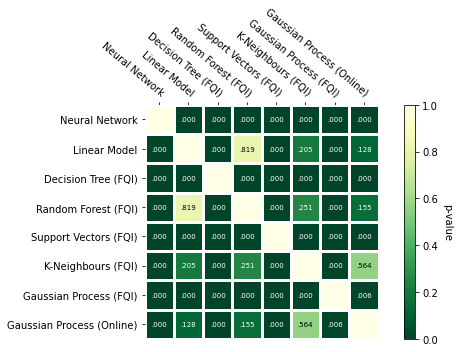

In [5]:
fig, ax = plt.subplots(figsize=(8,5))

im, cbar = plot_heatmap(p_values, legends, legends, ax=ax,
                   cmap="YlGn_r", cbarlabel="p-value")

def func(x, pos):
    return "{:.3f}".format(x).replace("0.", ".").replace("1.000", "").replace("1.100", "1.000")

annotate_heatmap(im, valfmt=matplotlib.ticker.FuncFormatter(func), size=7)

fig.tight_layout()
plt.savefig(f"{environment}_ttest_pvalues.pdf", format="pdf", bbox_inches="tight")